# XGBoost C2 Symmetry Classifier

In this notebook, we conduct our analysis of C2 symmetries using the open source machine learning software XGBoost. Of the approaches, this model boasted the highest accuracy score, as well as efficiently handled a data set with ~5000 proteins. 

XGBoost employs gradient boosting to synthesize many weak machine learning models (in our case decision trees) into a much stronger model.

In [1]:
import pandas as pd
import numpy as nptrees
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score

We read a preformatted data frame on proteins on which to train the model. The commented code shows how to build such a data frame from a folder of .cif files.

In [2]:
### Format a data frame from a folder of .cif files
# sys.path.append('../src/')
# from DataFormatting import *
# pro_df = protein_data_frame('[FOLDER GOES HERE]', '../tabular-data/protein_df.csv')

### Import data frame from previously formatted csv
pro_df = pd.read_csv('../tabular-data/large_protein_df.csv', index_col=0)

In [3]:
print(pro_df)

      B     N  F     C  G  SE  R     O      H   P  ...  MHW  DGL  GLY  TPO  \
7VDU  0   408  0  1557  0   0  0   418      0   0  ...    0    0   17    0   
5Q14  0   676  0  2568  0   0  0   741      0   0  ...    0    0    7    0   
5I0W  0   423  0  1686  0   0  0   509      0   0  ...    0    0   20    0   
7K8O  0   563  0  2095  0   0  0   667      0   0  ...    0    0   33    0   
7G0A  0   196  0   754  0   0  0   230      0   0  ...    0    0   11    0   
...  ..   ... ..   ... ..  .. ..   ...    ...  ..  ...  ...  ...  ...  ...   
4XB8  0  1038  0  3793  0   0  0  1169      0   0  ...    0    0   32    0   
4Q9W  0   600  0  2382  0   0  0   715      0   0  ...    0    0   18    0   
3ZJT  0  1415  0  4924  0   0  0  1801      0  81  ...    0    0   60    0   
4WGX  0  2485  0  9073  0   0  0  2715  14268   0  ...    0    0   46    0   
5SY7  0   941  0  3239  0   0  0  1065      0  40  ...    0    0   47    0   

      YCM  doub  trip  sing  OLIG_COUNT  SYMMETRY  
7VDU    0  

Now we need to separate the training data from the testing data. We take about 20% of the data set and reserve it for testing later, and train on the remaining 80%.

In [4]:
### Partition the data frame into a training set and a testing set. 
columns_to_remove = ['SYMMETRY']

test_data = pro_df.sample(pro_df.shape[0]//5)
test_x = test_data.drop(columns=columns_to_remove,axis=1)
test_y = test_data['SYMMETRY']
print('C2 symmetries in test data :',test_y.astype(bool).sum(axis=0),'/',test_y.size)

train_data = pro_df.drop(test_data.index)
train_x = train_data.drop(columns=columns_to_remove,axis=1)
train_y = train_data['SYMMETRY']
print('C2 symmetries in train data :',train_y.astype(bool).sum(axis=0),'/',train_y.size)

C2 symmetries in test data : 233 / 997
C2 symmetries in train data : 953 / 3992


Now we have the data in an appropriate format to build and fit an XGBoost classifier.

In [5]:
#Fit an XGBoost model to the data
model = XGBClassifier()
model.fit(train_x,train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Let's see how the model performs on the training data.

In [6]:
# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data',predict_train) 

Target on train data [0 0 1 ... 0 0 0]


In [7]:
# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('Accuracy score on train dataset : ', accuracy_train)

Accuracy score on train dataset :  0.999749498997996


It performs very well, which is unsurprising. Let's see how it does on the test data now.

In [8]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data', predict_test) 

Target on test data [1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0
 0 1 

In [9]:
# Accuracy score on test dataset
accuracy_test = accuracy_score(test_y, predict_test)
print('Accuracy score on test dataset : ', accuracy_test)
print('Mode accuracy on test dataset  : ', test_y.value_counts().max()/test_y.size)

Accuracy score on test dataset :  0.9037111334002006
Mode accuracy on test dataset  :  0.7662988966900702


Our baseline model guesses the mode of the training data set for every input from the test data. The XGBoost accuracy is consistently 12-15 percentage points higher than the mode accuracy. Let's see what happens when we perform this analysis many times and take an average of the accuracies.

In [10]:
avg_model_acc = 0
avg_mode_acc = 0
columns_to_remove = ['SYMMETRY']
n = 50

for i in range(n):
    test_data = pro_df.sample(pro_df.shape[0]//5)
    test_x = test_data.drop(columns=columns_to_remove,axis=1)
    test_y = test_data['SYMMETRY']
    train_data = pro_df.drop(test_data.index)
    train_x = train_data.drop(columns=columns_to_remove,axis=1)
    train_y = train_data['SYMMETRY']
    
    model = XGBClassifier()
    model.fit(train_x,train_y)
    predict_test = model.predict(test_x)
    avg_model_acc = avg_model_acc + accuracy_score(test_y, predict_test)
    avg_mode_acc = avg_mode_acc + test_y.value_counts().max()/test_y.size

avg_model_acc = avg_model_acc/n
avg_mode_acc = avg_mode_acc/n

print('Average accuracy score on test dataset : ', avg_model_acc)
print('Average mode accuracy on test dataset  : ', avg_mode_acc)

Average accuracy score on test dataset :  0.9045336008024072
Average mode accuracy on test dataset  :  0.7597592778335007


Which features were the most important in our prediction? The XGBoost model gives weights to these features according to how important these were in the decision trees.

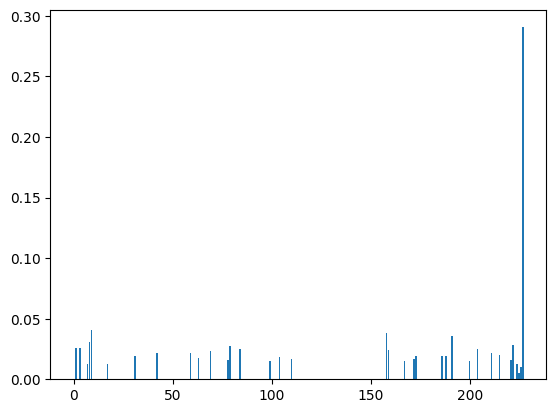

In [11]:
#Which columns were most important in determining if the protein had C2 symmetry?
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

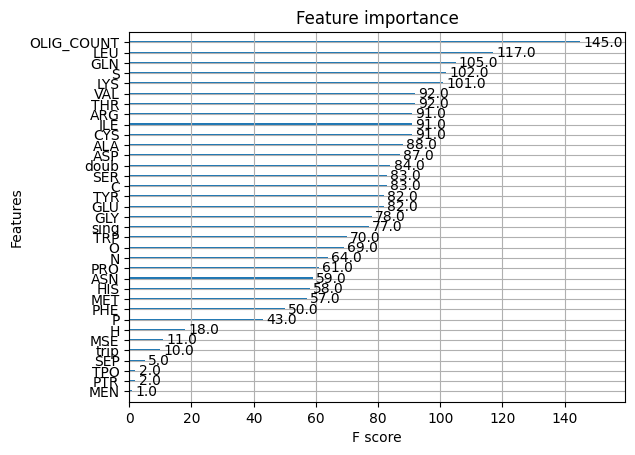

In [12]:
plot_importance(model)

Oligomeric count seems to be far and away the most useful feature. This feature is the number of (large) repeated subunits within a protein. If we take away this feature, the model performs substantially worse.

In [13]:
### Partition the data frame into a training set and a testing set. This time we remove the oligomeric count from the features.
columns_to_remove = ['SYMMETRY', 'OLIG_COUNT']

test_data = pro_df.sample(pro_df.shape[0]//5)
test_x = test_data.drop(columns=columns_to_remove,axis=1)
test_y = test_data['SYMMETRY']

train_data = pro_df.drop(test_data.index)
train_x = train_data.drop(columns=columns_to_remove,axis=1)
train_y = train_data['SYMMETRY']

In [14]:
#Fit an XGBoost model to the data
model = XGBClassifier()
model.fit(train_x,train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [15]:
predict_test = model.predict(test_x) 

accuracy_test = accuracy_score(test_y, predict_test)
print('Accuracy score on test dataset : ', accuracy_test)
print('Mode accuracy on test dataset  : ', test_y.value_counts().max()/test_y.size)

Accuracy score on test dataset :  0.802407221664995
Mode accuracy on test dataset  :  0.7913741223671013


The accuracy score of the XGBoost model is now much closer to the mode, albeit still a couple of percentage points above. Let's take an average over many iterations of this analysis.

In [16]:
avg_model_acc = 0
avg_mode_acc = 0
columns_to_remove = ['SYMMETRY', 'OLIG_COUNT']
n = 50

for i in range(n):
    test_data = pro_df.sample(pro_df.shape[0]//5)
    test_x = test_data.drop(columns=columns_to_remove,axis=1)
    test_y = test_data['SYMMETRY']
    train_data = pro_df.drop(test_data.index)
    train_x = train_data.drop(columns=columns_to_remove,axis=1)
    train_y = train_data['SYMMETRY']
    
    model = XGBClassifier()
    model.fit(train_x,train_y)
    predict_test = model.predict(test_x)
    avg_model_acc = avg_model_acc + accuracy_score(test_y, predict_test)
    avg_mode_acc = avg_mode_acc + test_y.value_counts().max()/test_y.size

avg_model_acc = avg_model_acc/n
avg_mode_acc = avg_mode_acc/n

print('Average accuracy score on test dataset : ', avg_model_acc)
print('Average mode accuracy on test dataset  : ', avg_mode_acc)

Average accuracy score on test dataset :  0.7895085255767299
Average mode accuracy on test dataset  :  0.763791374122367


The importance of the features is now much more spread out. The importance of these features also varied far more with respect to the random sample selected for the training data.

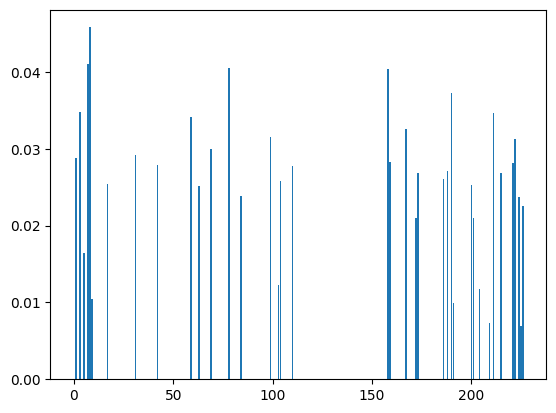

In [17]:
#Which columns were most important in determining if the protein had C2 symmetry?
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

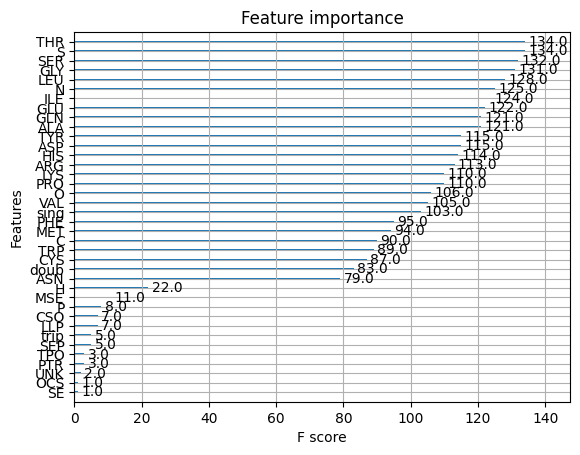

In [18]:
plot_importance(model)